<a href="https://colab.research.google.com/github/John-Liu18/Colab/blob/main/5_29_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
ls "/content/drive/MyDrive/FJU/文本"

'Evenings with idries Shah.txt'   Kara_Kush.txt  'The Wat of the Sufi.txt'


In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
ls "/content/drive/MyDrive/FJU/文本"

'Evenings with idries Shah.txt'   Kara_Kush.txt  'The Wat of the Sufi.txt'


In [4]:
import nltk
from nltk.corpus import PlaintextCorpusReader

#PlaintextCorpusReader
#讀取純文字檔案，並把它們當作語料庫（corpus）來分析
corpus_root = '/content/drive/MyDrive/FJU/文本' # 請改成自己的路徑 File Path
wordlists = PlaintextCorpusReader(corpus_root, '.*') # .* => find all files, .txt => only find txt files

books = wordlists.fileids() # 回傳檔名
print(books)

['Evenings with idries Shah.txt', 'Kara_Kush.txt', 'The Wat of the Sufi.txt']


In [5]:
import nltk
testText = wordlists.words('Evenings with idries Shah.txt')
print(testText)

# 轉換成 NLTK 的 Text 類別物件，為了能夠進行分析
single = nltk.text.Text(testText)
print(single)

['Evenings', 'with', 'idries', 'Shah', 'Books', 'by', ...]
<Text: Evenings with idries Shah Books by Idries Shah...>


In [6]:
testText2 = wordlists.words('Evenings with idries Shah.txt')
single2 = nltk.text.Text(testText2)

single2.count("drug")

single2.similar("drug")

single.concordance("happy", lines=100)  # 查找 'happy' 出現的上下文

context = ["drug"]
single2.common_contexts(context)

No matches
no matches
('The following word(s) were not found:', 'drug')


In [7]:
testText2 = wordlists.words('Evenings with idries Shah.txt')
single2 = nltk.text.Text(testText2)

single2.count("with")

single2.similar("with")

single.concordance("with", lines=100)  # 查找 'happy' 出現的上下文

context = ["with"]
single2.common_contexts(context)

of is when needs walking
Displaying 58 of 58 matches:
                            Evenings with idries Shah Books by Idries Shah Suf
er After Truth Observations Evenings with Idries Shah The Commanding Self Univ
sdom ( Aflaki ' s Munaqib ) Evenings with idries Shah idries Shah ISF PUBLISHI
 been asserted by them in accordance with the Copyright , Designs and Patents 
sf - publishing . org in association with The idries Shah Foundation The idrie
ingdom Charity No . 1150876 Evenings with Idries Shah These materials , as tho
 compilations of discussion sessions with Rumi and other Sufis , form a part o
king to the audience and interacting with its members has what is experienced 
h demands that the body be nourished with food .' The Second Sufi , also priva
 , it was only to say : ' i EVENINGS WITH IDRIES SHAH do not remember who he i
ht that the young woman was EVENINGS WITH IDRIES SHAH laughing at something wh
well , and were taking the girl away with them . Then the two Sufis turned to

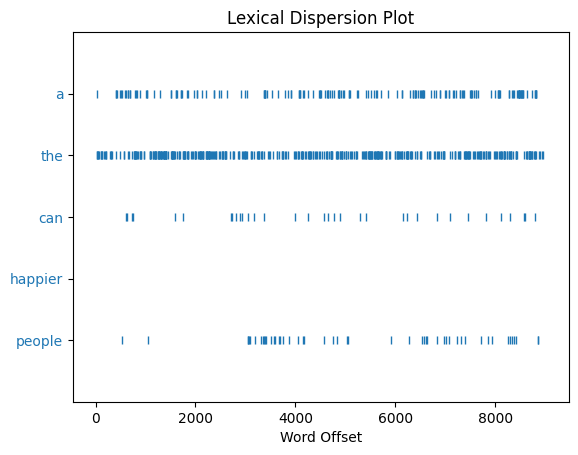

In [8]:
import nltk
testText = wordlists.words('Evenings with idries Shah.txt')
single = nltk.text.Text(testText)

findList = ["a","the", "can", "happier", "people"]
single.dispersion_plot(findList)

<Axes: xlabel='Samples', ylabel='Counts'>

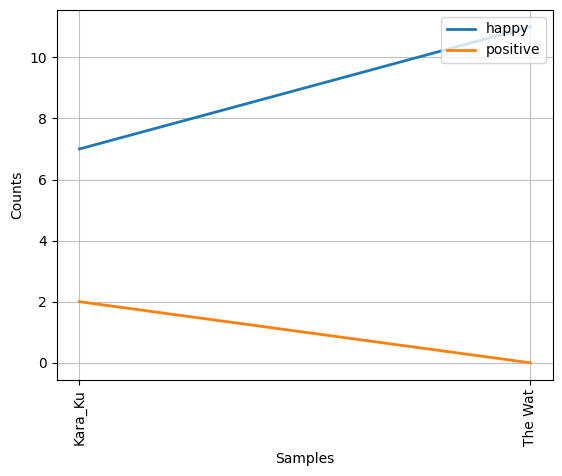

In [9]:
cfd = nltk.ConditionalFreqDist(
    (target, fileid[:7]) # [:7]取至前七位字元
    for fileid in wordlists.fileids() # 取出各個文檔
    for w in wordlists.words(fileid)  # 所有文本的字詞
    for target in ['happy', 'positive', 'negative'] # 篩選字詞
    if w.lower() == target) # w.lower().startswith(target)  # 字詞 happier也能納入計算
cfd.plot()

<Axes: xlabel='Samples', ylabel='Counts'>

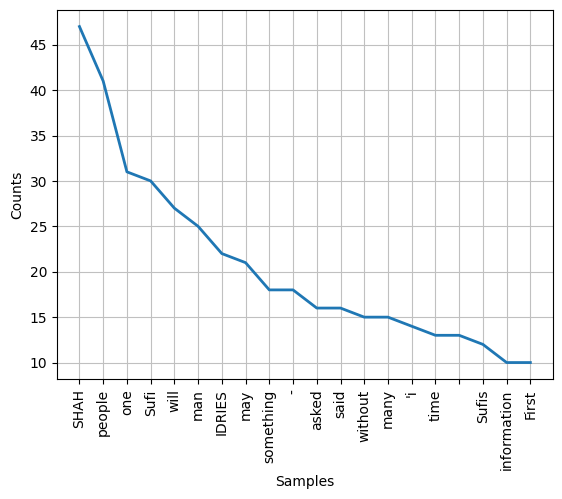

In [11]:
import nltk
from wordcloud import STOPWORDS

dataset = wordlists.raw('Evenings with idries Shah.txt')

tokens = dataset.split(' ') #以空格斷詞
clean_tokens = tokens[:]

for token in tokens:
  if token.lower() in STOPWORDS:
    clean_tokens.remove(token)  #若有STOPWORDS,remove掉

freq = nltk.FreqDist(clean_tokens)

# for key,val in freq.items():
#  print (str(key) + ':' + str(val))
freq.plot(20,cumulative=False)

<Axes: xlabel='Samples', ylabel='Cumulative Counts'>

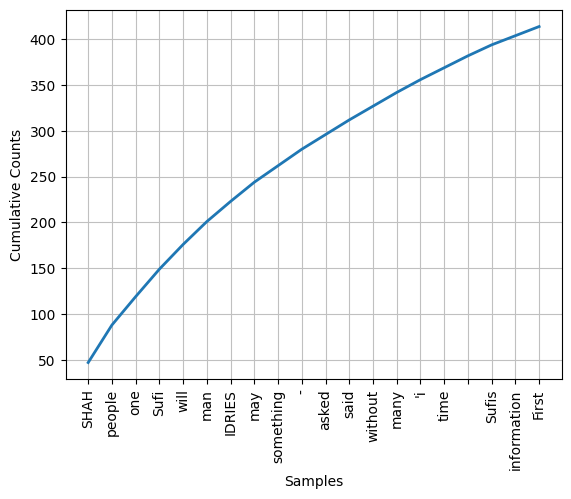

In [12]:
import nltk
from wordcloud import STOPWORDS

dataset = wordlists.raw('Evenings with idries Shah.txt')

tokens = dataset.split(' ') #以空格斷詞
clean_tokens = tokens[:]

for token in tokens:
  if token.lower() in STOPWORDS:
    clean_tokens.remove(token)  #若有STOPWORDS,remove掉

freq = nltk.FreqDist(clean_tokens)

# for key,val in freq.items():
#  print (str(key) + ':' + str(val))
freq.plot(20,cumulative=True)

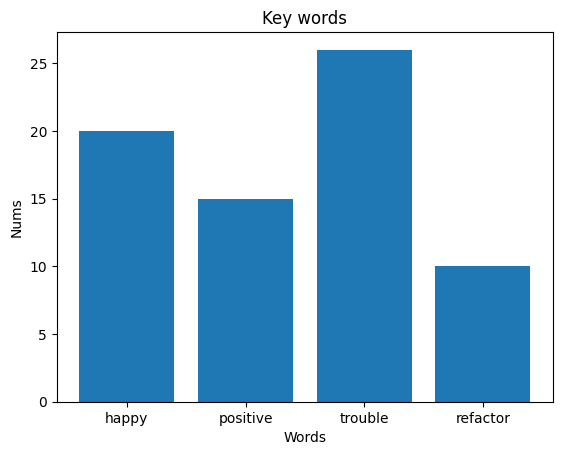

<Figure size 500x400 with 0 Axes>

In [13]:
import matplotlib.pyplot as plt

x = ['happy', 'positive', 'trouble', 'refactor']
y = [20, 15, 26, 10]


plt.bar(x, y)     #繪製長條圖
plt.title('Key words')          #設定圖形標題
plt.xlabel('Words')                #設定X軸標籤
plt.ylabel('Nums')                   #設定Y軸標籤
plt.figure(figsize=(5,4))
plt.show()

In [14]:
import matplotlib.pyplot as plt

x = [data[0] for data in fdist1] # ['people', 'older', 'life' ...]
y = [data[1] for data in fdist1] # ['29', '19', '12' ...]

plt.bar(x, y)     #繪製長條圖
plt.title('Key words')          #設定圖形標題
plt.xlabel('Words')                #設定X軸標籤
plt.ylabel('Nums')                   #設定Y軸標籤
plt.xticks(fontsize=10, rotation=90)
plt.show()

NameError: name 'fdist1' is not defined